In [ ]:
!pip install soccerplots

In [ ]:
#@title PLAYER SIMILARITY TOOL FOR RECRUITMENT{ run: "auto", vertical-output: true, display-mode: "form" }

import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

data = pd.read_excel('/content/masterdata.xlsx')

Player_Name = "R. Lewandowski" #@param ["R. Krishna","V. van Dijk"] {allow-input: true}
Max_age_players =  37#@param {type:"integer"}
Market_value_in_euros = 5000000000 #@param {type:"number"}
No_of_Similar_players = 10 #@param {type:"integer"}
Metrics = "Defensive actions" #@param ["Attacking and creativity", "Passing and progression", "Defensive actions", "All"]

def parameters(Metrics):
  col_dict = {'Attacking and creativity':0, 'Passing and progression':1,'Defensive actions':2}
  l = []

  for i in range(1, 4):
    path = str(i)+".txt"
    f = open(path, 'r')
    l.append([j[:-1] for j in f.readlines() if j[:2]!='//'])
    f.close()

  return l[col_dict[Metrics]]


warnings.filterwarnings("ignore")
def player_similarity(df,target,age,Market_value):
  target_player = df[df['Player']==target]
  target_position = target_player['Categorical position']
  i= target_player.index[0]

  df=df[df['Categorical position']==target_position[i]]

  col_names = []

  if Metrics!= 'All':
    col_names = parameters(Metrics)

  else:
    for col in data.columns: 
        col_names.append(col)  
    del col_names[0:22]

  X = df[col_names]

  kmeans = KMeans(n_clusters = 4,random_state=100)
  kmeans.fit(X)
  df['cluster'] = kmeans.predict(X)


  final_table = df[['Player','Team','Categorical position','Position','Age','Market value','Contract expires','cluster']]
  target_player = df[df['Player']==target]
  target_cluster = target_player['cluster']
  i= target_player.index[0]

  final_table = final_table[final_table['cluster']==target_cluster[i]]
  final_table['Similarity']=0.00
  #final_table['Distance']=0.0000
  for j,row in df.iterrows():
    x = row['cluster']
    if x==target_cluster[i]:
      comparing_player = row[col_names]
      target = target_player[col_names]
      A=np.array(target).reshape(-1)
      B=np.array(comparing_player).reshape(-1)

      cos_sim=np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))
      final_table['Similarity'][j]=cos_sim*100
      #final_table['Distance'][j]=(1-cos_sim)

  
  final_table.drop(final_table[final_table['Age'] >= age].index, inplace = True)
  final_table.drop(final_table[final_table['Market value'] >= Market_value].index, inplace = True)
  final_table.drop(final_table[final_table['Player'] == Player_Name].index, inplace = True)
  final_table.sort_values("Similarity", axis = 0, ascending = False,inplace = True) 
  final_table.reset_index(inplace=True)
  final_table.index = np.arange(1,len(final_table)+1)
  final_table=final_table.drop(['index'], axis = 1)
               
  
  return final_table
 


final_table = player_similarity(data,Player_Name,Max_age_players,Market_value_in_euros)
final_table.head(No_of_Similar_players)

,Player,Team,Categorical position,Position,Age,Market value,Contract expires,cluster,Similarity
1,Maxi Gómez,Valencia,Centre Forward,CF,24,25000000,2024-06-30,2,96.308123
2,L. Messi,Barcelona,Centre Forward,"CF, RWF",33,80000000,2021-06-30,2,94.568182
3,K. Opseth,Bengaluru,Centre Forward,CF,31,400000,2022-12-31,2,94.372038
4,B. Yılmaz,Lille,Centre Forward,CF,35,2000000,2022-06-30,2,94.010751
5,A. Isak,Real Sociedad,Centre Forward,CF,21,30000000,2024-06-30,2,93.982964
6,S. Jovetić,Monaco,Centre Forward,"CF, LWF",31,6500000,2021-06-30,2,93.083736
7,S. Verdi,Torino,Centre Forward,"CF, AMF",28,8000000,2023-06-30,2,93.019051
8,W. Ben Yedder,Monaco,Centre Forward,CF,30,40000000,2024-06-30,2,92.491359
9,A. Delort,Montpellier,Centre Forward,CF,29,15000000,2024-06-30,2,92.411921
10,S. Guirassy,Rennes,Centre Forward,CF,25,13000000,2025-06-30,2,92.082343


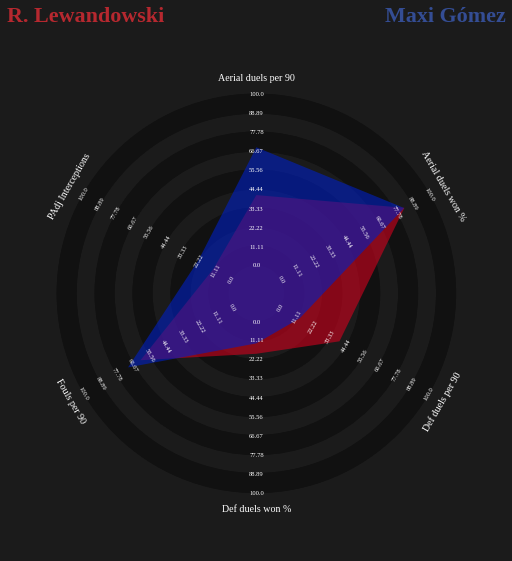

In [ ]:
#@title Radar comparison{ run: "auto", vertical-output: true, display-mode: "form" }
from soccerplots.radar_chart import Radar
import pandas as pd

comparing_player = "Maxi G\xF3mez" #@param {type:"string"}


target_player = data[data['Player']==Player_Name]

p1t = target_player['Team']
comparing_player1 = data[data['Player']==comparing_player]
p2t = comparing_player1['Team']
frames = [target_player, comparing_player1]

  
df = pd.concat(frames)


def radar(data,num,bg,pc,lc,rc,player1,player2,comparing_player,Player_Name,Metrics):
    radar = Radar(background_color=bg, patch_color=pc, label_color=lc,
            range_color=rc)

        
    label1 = ['Non-penalty goals per 90','xG per 90','xG/Shot','Head goals per 90','Shots per 90','Dribbles per 90','Shots on target %','Goal conv., %','Touches in box per 90']
    label2=['xA per 90','Key passes per 90','Smt passes per 90','Passes to penalty area per 90','Passes per 90','Passes acc. %','Avg pass length, m']
    label3=['Aerial duels per 90','Aerial duels won %','Def duels per 90','Def duels won %','Fouls per 90','PAdj Interceptions']


    ranges1 = [(0, 100), (0, 100), (0,100), (0,100), (0,100), (0,100), 
                               (0,100), (0, 100), (0, 100)]
    ranges2 = [(0, 100), (0, 100), (0,100), (0,100), (0,100), (0,100), 
                               (0,100)]
    ranges3 = [(0, 100), (0, 100), (0,100), (0,100), (0,100), (0,100)]
              
    attacking = [[round(data['Non-penalty goals per 90'].values[0], 2), round(data['xG per 90'].values[0], 2), round(data['xG/Shot'].values[0], 2), 
                      round(data['Head goals per 90'].values[0], 2), round(data['Shots per 90'].values[0], 2), 
                      round(data['Dribbles per 90'].values[0], 2), round(data['Shots on target, %'].values[0], 2),
                      round(data['Goal conversion, %'].values[0], 2), round(data['Touches in box per 90'].values[0], 2)],[round(data['Non-penalty goals per 90'].values[1], 2), round(data['xG per 90'].values[1], 2), round(data['xG/Shot'].values[1], 2), 
                      round(data['Head goals per 90'].values[1], 2), round(data['Shots per 90'].values[1], 2), 
                      round(data['Dribbles per 90'].values[1], 2), round(data['Shots on target, %'].values[1], 2),
                      round(data['Goal conversion, %'].values[1], 2), round(data['Touches in box per 90'].values[1], 2)]]

    passing = [[round(data['xA per 90'].values[0], 2), round(data['Key passes per 90'].values[0], 2), round(data['Smart passes per 90'].values[0], 2), 
                round(data['Passes to penalty area per 90'].values[0], 2), round(data['Passes per 90'].values[0], 2), 
                round(data['Accurate passes, %'].values[0], 2), round(data['Average pass length, m'].values[0], 2)],[round(data['xA per 90'].values[1], 2), round(data['Key passes per 90'].values[1], 2), round(data['Smart passes per 90'].values[1], 2), 
                round(data['Passes to penalty area per 90'].values[1], 2), round(data['Passes per 90'].values[1], 2), 
                round(data['Accurate passes, %'].values[1], 2), round(data['Average pass length, m'].values[1], 2)]]
             

    defending = [[round(data['Aerial duels per 90'].values[0], 2), round(data['Aerial duels won, %'].values[0], 2), round(data['Defensive duels per 90'].values[0], 2), 
                 round(data['Defensive duels won, %'].values[0], 2), round(data['Fouls per 90'].values[0], 2), 
                 round(data['PAdj Interceptions'].values[0], 2)],[round(data['Aerial duels per 90'].values[1], 2), round(data['Aerial duels won, %'].values[1], 2), round(data['Defensive duels per 90'].values[1], 2), 
                 round(data['Defensive duels won, %'].values[1], 2), round(data['Fouls per 90'].values[1], 2), 
                 round(data['PAdj Interceptions'].values[1], 2)]]
                
    title = dict(
    title_name= Player_Name,
    title_color='#B6282F',
    title_name_2= comparing_player,
    title_color_2='#344D94',
    title_fontsize=22)

    if Metrics=='Attacking and creativity':
      attacking=radar.plot_radar(ranges=ranges1,params=label1,values=attacking,radar_color=[player1, player2], 
              filename="attacking.png",end_color=bg,dpi=600,compare=True,title=title)
    elif Metrics=='Passing and progression':           
      passing=radar.plot_radar(ranges=ranges2,params=label2,values=passing,radar_color=[player1, player2], 
              filename="passing.png",end_color=bg,dpi=600,compare=True,title=title)
    elif Metrics=='Defensive actions':           
      defending=radar.plot_radar(ranges=ranges3,params=label3,values=defending,radar_color=[player1, player2], 
              filename="defending.png",end_color=bg,dpi=600,compare=True,title=title)
    else:
      attacking=radar.plot_radar(ranges=ranges1,params=label1,values=attacking,radar_color=[player1, player2], 
              filename="attacking.png",end_color=bg,dpi=600,compare=True,title=title)
      
      passing=radar.plot_radar(ranges=ranges2,params=label2,values=passing,radar_color=[player1, player2], 
              filename="passing.png",end_color=bg,dpi=600,compare=True,title=title)
      
      defending=radar.plot_radar(ranges=ranges3,params=label3,values=defending,radar_color=[player1, player2], 
              filename="defending.png",end_color=bg,dpi=600,compare=True,title=title)


radar(df,2,"#1B1B1B","#111111","#FFFFFF","#FFFFFF","#D4011D","#0020C4",comparing_player,Player_Name,Metrics)


In [5]:
#@title INTERPOLATION FOR PLAYER RECRUITMENT{ run: "auto", vertical-output: true, display-mode: "form" }


import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

data = pd.read_excel('/content/masterdata.xlsx')

Player_Name1 = "L. Messi" #@param ["R. Krishna","V. van Dijk"] {allow-input: true}
Player_Name2 = "Maxi G\xF3mez" #@param ["R. Krishna","V. van Dijk"] {allow-input: true}
Percentage_of_player1 = 50 #@param {type:"slider", min:1, max:99, step:1}
p = Percentage_of_player1/100

def player_similarity(df, player1, player2, p):
    #print(playerOne.head(), playerTwo.head())

    target_player1 = df[df['Player']==player1]
    target_position1 = target_player1['Categorical position']
    i= target_player1.index[0]


    target_player2 = df[df['Player']==player2]
    target_position2 = target_player2['Categorical position']
    o = target_player2.index[0]


    

    df1=df[df['Categorical position']==target_position1[i]]
    df2=df[df['Categorical position']==target_position2[o]]


    if target_position1[i]!=target_position2[o]:
        frames = [df1, df2]
        df = pd.concat(frames)
    else:
        df = df1
    col_names = []
    for col in data.columns: 
        col_names.append(col) 
    del col_names[0:22]

    X = df[col_names]

    kmeans = KMeans(n_clusters = 4,random_state=100)
    kmeans.fit(X)
    df['cluster'] = kmeans.predict(X)
    #print(df['cluster'].value_counts())
    temptable = df[['Player','Team','Categorical position','Position','Age','Market value','Contract expires','cluster']]
  
    playerOne = df.loc[df['Player']==player1]
    playerTwo = df.loc[df['Player']==player2]
    #print(playerOne)
    #print(playerTwo)
    cluster1 = playerOne['cluster'].values[0]
    cluster2 = playerTwo['cluster'].values[0]


    table1 = temptable[temptable['cluster']==cluster1]
    table2 = temptable[temptable['cluster']==cluster2]
    
    if cluster1!=cluster2:
        frames = [table1, table2]
        final_table = pd.concat(frames)
    else:
        final_table = table1

    final_table['Similarity']=0.00
    #final_table['Distance']=0.0000
    target1 = playerOne[col_names]
    target2 = playerTwo[col_names]
    T1 = np.array(target1)#.reshape(-1)
    T2=np.array(target2)#.reshape(-1)
            
    for j,row in df.iterrows():
        x = row['cluster']
        if x==cluster1 or x==cluster2:
            comparing_player = row[col_names]
            B=np.array(comparing_player)#.reshape(-1)
            A = (p)*T1 + (1-p)*T2
            
            cos_sim=np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))
            final_table['Similarity'][j]=cos_sim*100
            #final_table['Distance'][j]=(1-cos_sim)

    final_table.drop(final_table[final_table['Player'] == Player_Name1].index, inplace = True)
    final_table.drop(final_table[final_table['Player'] == Player_Name2].index, inplace = True)
    final_table.sort_values("Similarity", axis = 0, ascending = False,inplace = True) 
    final_table.reset_index(inplace=True)
    #final_table=final_table.drop(['cluster','index'], axis = 1)
                

    return final_table
 
    

final_table = player_similarity(data, Player_Name1, Player_Name2, p)
final_table.head(10)

,index,Player,Team,Categorical position,Position,Age,Market value,Contract expires,cluster,Similarity
0,1909,Cristiano Ronaldo,Juventus,Centre Forward,"CF, LWF",36,50000000,2022-06-30,3,96.001398
1,96,H. Kane,Tottenham Hotspur,Centre Forward,CF,27,120000000,2024-06-30,3,95.313589
2,1918,João Pedro,Cagliari,Centre Forward,"CF, AMF",29,18000000,2023-06-30,3,94.867260
3,573,W. Ben Yedder,Monaco,Centre Forward,CF,30,40000000,2024-06-30,3,94.391662
4,1930,A. Sánchez,Internazionale,Centre Forward,CF,32,10000000,2023-06-30,3,94.186010
5,1032,A. Kramarić,Hoffenheim,Centre Forward,"CF, LCMF, AMF",29,32000000,2022-06-30,3,94.140807
6,2412,R. Vloet,Heracles,Centre Forward,"CF, AMF",25,950000,2023-06-30,3,94.056085
7,2798,João Félix,Atlético Madrid,Centre Forward,"CF, AMF",21,80000000,2026-06-30,3,93.804810
8,572,M. Depay,Olympique Lyonnais,Centre Forward,CF,27,45000000,2021-06-30,3,93.718643
9,2822,Iago Aspas,Celta de Vigo,Centre Forward,CF,33,10000000,2023-06-30,3,93.682685


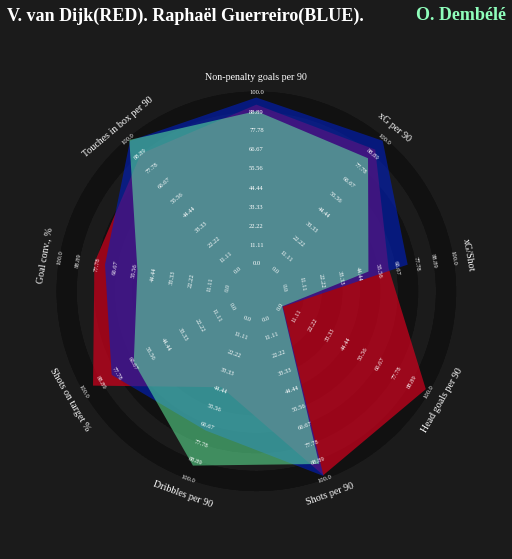

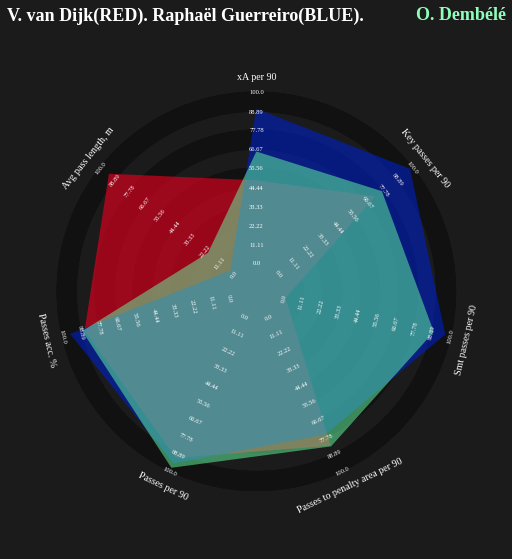

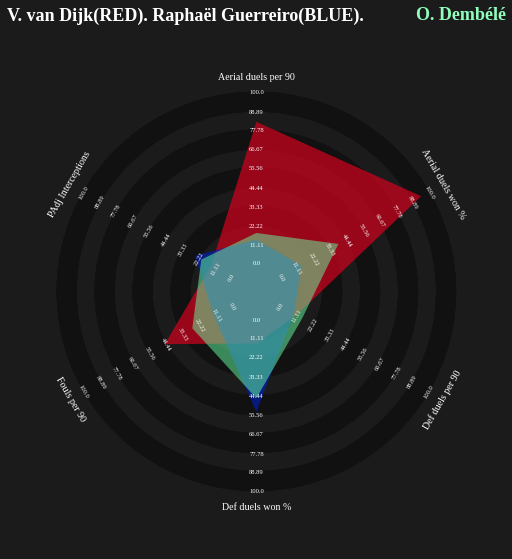

In [ ]:
#@title Radar Comparison(Of 3 Players){ run: "auto", vertical-output: true, display-mode: "form" }

from soccerplots.radar_chart import Radar
import pandas as pd

comparing_player = "O. Demb\xE9l\xE9" #@param {type:"string"}


target_player1 = data[data['Player']==Player_Name1]
target_player2 = data[data['Player']==Player_Name2]

comparing_player1 = data[data['Player']==comparing_player]

frames = [target_player1,target_player2,comparing_player1]

  
df = pd.concat(frames)
df.head()

from soccerplots.radar_chart import Radar
import pandas as pd



def radar3(data,num,bg,pc,lc,rc,player1,player2):
    radar = Radar(background_color=bg, patch_color=pc, label_color=lc,
            range_color=rc)

    label1 = ['Non-penalty goals per 90','xG per 90','xG/Shot','Head goals per 90','Shots per 90','Dribbles per 90','Shots on target %','Goal conv., %','Touches in box per 90']
    label2=['xA per 90','Key passes per 90','Smt passes per 90','Passes to penalty area per 90','Passes per 90','Passes acc. %','Avg pass length, m']
    label3=['Aerial duels per 90','Aerial duels won %','Def duels per 90','Def duels won %','Fouls per 90','PAdj Interceptions']


    ranges1 = [(0, 100), (0, 100), (0,100), (0,100), (0,100), (0,100), 
                               (0,100), (0, 100), (0, 100)]
    ranges2 = [(0, 100), (0, 100), (0,100), (0,100), (0,100), (0,100), 
                               (0,100)]
    ranges3 = [(0, 100), (0, 100), (0,100), (0,100), (0,100), (0,100)]
              
    attacking = [[round(data['Non-penalty goals per 90'].values[0], 2), round(data['xG per 90'].values[0], 2), round(data['xG/Shot'].values[0], 2), 
                 round(data['Head goals per 90'].values[0], 2), round(data['Shots per 90'].values[0], 2), 
                  round(data['Dribbles per 90'].values[0], 2), round(data['Shots on target, %'].values[0], 2),
                             round(data['Goal conversion, %'].values[0], 2), round(data['Touches in box per 90'].values[0], 2)],[round(data['Non-penalty goals per 90'].values[1], 2), round(data['xG per 90'].values[1], 2), round(data['xG/Shot'].values[1], 2), 
                             round(data['Head goals per 90'].values[1], 2), round(data['Shots per 90'].values[1], 2), 
                             round(data['Dribbles per 90'].values[1], 2), round(data['Shots on target, %'].values[1], 2),
                             round(data['Goal conversion, %'].values[1], 2), round(data['Touches in box per 90'].values[1], 2)],
                            [round(data['Non-penalty goals per 90'].values[2], 2), round(data['xG per 90'].values[2], 2), round(data['xG/Shot'].values[2], 2), 
                             round(data['Head goals per 90'].values[2], 2), round(data['Shots per 90'].values[2], 2), 
                             round(data['Dribbles per 90'].values[2], 2), round(data['Shots on target, %'].values[2], 2),
                             round(data['Goal conversion, %'].values[2], 2), round(data['Touches in box per 90'].values[2], 2)]]

    passing = [[round(data['xA per 90'].values[0], 2), round(data['Key passes per 90'].values[0], 2), round(data['Smart passes per 90'].values[0], 2), 
                              round(data['Passes to penalty area per 90'].values[0], 2), round(data['Passes per 90'].values[0], 2), 
                              round(data['Accurate passes, %'].values[0], 2), round(data['Average pass length, m'].values[0], 2)],[round(data['xA per 90'].values[1], 2), round(data['Key passes per 90'].values[1], 2), round(data['Smart passes per 90'].values[1], 2), 
                              round(data['Passes to penalty area per 90'].values[1], 2), round(data['Passes per 90'].values[1], 2), 
                              round(data['Accurate passes, %'].values[1], 2), round(data['Average pass length, m'].values[1], 2)],
                            [round(data['xA per 90'].values[2], 2), round(data['Key passes per 90'].values[2], 2), round(data['Smart passes per 90'].values[2], 2), 
                              round(data['Passes to penalty area per 90'].values[2], 2), round(data['Passes per 90'].values[2], 2), 
                              round(data['Accurate passes, %'].values[2], 2), round(data['Average pass length, m'].values[2], 2)]]
             

    defending = [[round(data['Aerial duels per 90'].values[0], 2), round(data['Aerial duels won, %'].values[0], 2), round(data['Defensive duels per 90'].values[0], 2), 
                             round(data['Defensive duels won, %'].values[0], 2), round(data['Fouls per 90'].values[0], 2), 
                             round(data['PAdj Interceptions'].values[0], 2)],[round(data['Aerial duels per 90'].values[1], 2), round(data['Aerial duels won, %'].values[1], 2), round(data['Defensive duels per 90'].values[1], 2), 
                             round(data['Defensive duels won, %'].values[1], 2), round(data['Fouls per 90'].values[1], 2), 
                             round(data['PAdj Interceptions'].values[1], 2)],
                            [round(data['Aerial duels per 90'].values[2], 2), round(data['Aerial duels won, %'].values[2], 2), round(data['Defensive duels per 90'].values[2], 2), 
                             round(data['Defensive duels won, %'].values[2], 2), round(data['Fouls per 90'].values[2], 2), 
                             round(data['PAdj Interceptions'].values[2], 2)]]

    Player = Player_Name1 +"(RED). "+ Player_Name2+"(BLUE)."
                
    title = dict(
    title_name= Player,
    title_color='#FFFFFF',
    title_name_2= comparing_player,
    title_color_2='#8FFEBB',
    title_fontsize=18)



    attacking=radar.plot_radar(ranges=ranges1,params=label1,values=attacking,radar_color=[player1, player2,"#65FFA3"], 
                           filename="attacking.png",end_color=bg,dpi=600,title=title,alphas=[0.7, 0.6,0.5],compare=True)
                
    passing=radar.plot_radar(ranges=ranges2,params=label2,values=passing,radar_color=[player1, player2,"#65FFA3"], 
                           filename="passing.png",end_color=bg,dpi=600,alphas=[0.7, 0.6,0.5],compare=True,title=title)
                
    defending=radar.plot_radar(ranges=ranges3,params=label3,values=defending,radar_color=[player1, player2,"#65FFA3"], 
                           filename="defending.png",end_color=bg,dpi=600,alphas=[0.7, 0.6,0.5],compare=True,title=title)
    

    

                      
radar3(df,2,"#1B1B1B","#111111","#FFFFFF","#FFFFFF","#D4011D","#0020C4")